In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralCoclustering
import matplotlib.pyplot as plt

df = pd.read_excel('tmiRNA.xlsx')           
df = df.drop(labels=['Sample_ID'], axis=1)

[[10.71   6.867  5.205 ...  5.817  8.708 13.76 ]
 [ 9.118  5.115  9.768 ...  5.115  9.486 12.658]
 [ 9.615  4.885  5.284 ...  5.415  8.889 13.296]
 ...
 [ 9.84   5.592 13.27  ...  5.647 10.288 13.505]
 [ 9.384  5.982  3.489 ...  5.384  8.558 13.351]
 [ 9.22   5.433  7.497 ...  5.357  7.175 14.677]]



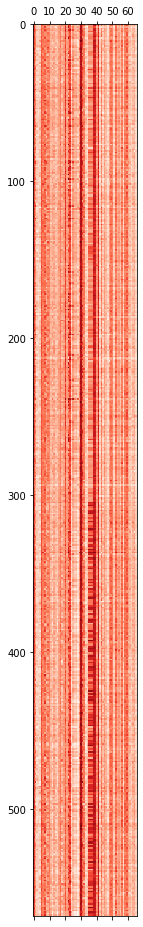

In [8]:
df = df.fillna(value= 0.0)

test_arr = np.array(df)

test_arr = test_arr.astype(np.float64)

test_arr = np.round(test_arr, decimals=3)

test_arr = np.where(test_arr == np.inf, 0, test_arr)
test_arr = np.where(test_arr == - np.inf, 0, test_arr)

test_arr = np.delete(test_arr, np.where(test_arr == 0), axis=1)

print(test_arr)

print('')

model = SpectralCoclustering(n_clusters=2, random_state=0)
model.fit(test_arr)
fit_arr = test_arr[np.argsort(model.row_labels_)]
fit_arr = fit_arr[:, np.argsort(model.column_labels_)]

plt.matshow(fit_arr, cmap=plt.cm.Reds)

In [10]:
# Adding the 'cluster' column to the original excel sheet.

df = pd.read_excel('tmiRNA.xlsx')           

clusters = list(model.row_labels_)

df['Clusters'] = clusters

df.to_excel('tmiRNA(clustered).xlsx')

df


,Sample_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,...,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Unnamed: 1882,Unnamed: 1883,Clusters
0,TCGA-HD-A6I0-11A,12.838941,12.831734,12.837878,12.892818,10.636627,8.400322,9.842439,12.033478,12.061124,...,5.833057,4.067365,0.0,2.110667,5.817222,8.707861,13.760273,NaN,NaN,0
1,TCGA-H7-7774-01A,12.899909,12.893724,12.897090,13.700646,11.765565,7.826635,8.532070,11.219927,11.261559,...,8.086253,3.351291,0.0,4.049135,5.114704,9.486097,12.658064,NaN,NaN,1
2,TCGA-CV-6943-01A,13.847010,13.832123,13.853437,14.778525,11.377200,7.968737,10.532058,12.257078,12.263649,...,6.323586,2.393985,0.0,1.724813,5.415286,8.888609,13.295764,NaN,NaN,0
3,TCGA-CN-5374-01A,13.162274,13.150927,13.162507,14.696093,11.273040,9.765269,8.609012,11.261339,11.325179,...,5.661275,1.986096,0.0,3.764149,5.682230,9.624859,13.580880,NaN,NaN,1
4,TCGA-CV-7104-01A,13.635659,13.644569,13.633326,13.889387,10.363927,9.105685,10.659704,12.609059,12.623285,...,6.513201,4.908736,0.0,3.080871,6.228964,8.255028,13.768469,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,TCGA-CV-7235-01A,14.198898,14.191933,14.199774,14.633410,10.984261,9.390803,10.436442,13.187354,13.192740,...,7.541891,2.690322,0.0,3.106988,5.724375,8.151940,13.326482,NaN,NaN,0
565,TCGA-HD-A6HZ-01A,12.279877,12.273364,12.297153,13.205137,8.676062,8.717346,9.159255,11.393912,11.408451,...,8.146057,3.655812,0.0,4.675666,5.869880,6.592917,13.922207,NaN,NaN,1
566,TCGA-CV-6935-11A,13.970788,13.969347,13.972345,14.311482,12.676349,8.063685,9.913157,12.443403,12.454534,...,6.715022,2.832075,0.0,2.574119,5.647128,10.287510,13.505307,NaN,NaN,0
567,TCGA-CV-7422-01A,13.192416,13.185702,13.195477,13.812417,10.490009,8.053852,9.807660,11.986089,12.024564,...,7.491474,3.374861,0.0,4.115448,5.384100,8.557658,13.350607,NaN,NaN,0


In [ ]:
X = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])

clustering = SpectralCoclustering(n_clusters=3, random_state=0).fit(X)

print(X)

nr = np.reshape(clustering.row_labels_, (6,1))

print('clustered array')

c_array = np.append(X, nr, axis=1)

print(c_array)

print(clustering.column_labels_)



[[1 1]
 [2 1]
 [1 0]
 [4 7]
 [3 5]
 [3 6]]
[2, 2, 1, 0, 0, 0]
clustered array
[[1 1 2]
 [2 1 2]
 [1 0 1]
 [4 7 0]
 [3 5 0]
 [3 6 0]]
[2 0]
